In [1]:
using TofSimulations
using PyPlot

# This is not needed usually
using Random: Xoshiro
rng = Xoshiro(1234)
;

## Step 1: Make an apparatus 

```julia
    Apparatus([position1 => voltage1, position2 => voltage2, ...])
```

An arbitrary number of meshed electrodes can be set in an apparatus for a TOF simulation. User needs to specify pairs of position along TOF axis and its voltage.
The following example prepares four plates and a detector.
The unit of voltages are V and the distances are in meter.

In [2]:
apprts = Apparatus([0.0 => 1200.0, 0.022 => 1000.0, 0.048 => 580.0, 0.08 => 0.0, 0.352 => 0.0]);

## Step 2: Run simulation
​
```julia
simulate_tof(apparatus, n, z0, m, v_beam, σv_beam, v_recoil, σv_recoil, Γ, β)
```
​
User need to specify the followings.
 * apparatus instance
 * number of particles to simulate
 * initial position of particle
 * mass of fragment in a.u.
 * beam velocity in m/s
 * half-width-half-maximum of beam velocity in m/s
 * recoil velocity in m/s
 * half-width-half-maximum of recoil velocity in m/s
 * laser polarization tilt angle $\Gamma$ in degree
 * anisotropy parameter $\beta$ 

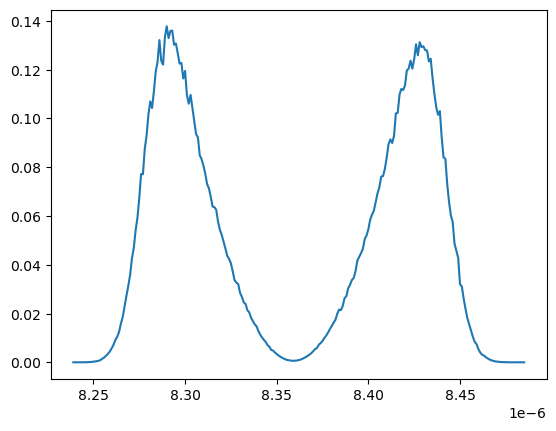

In [3]:
m = 79          # mass of fragment in a.u.
z0 = 0.011      # the center of the origin of particles
r0 = 10e-6      # the radius of the origin of particles
v_beam = 450    # beam velocity in m/s
σ_beam = 50     # half-width-half-maximum of beam velocity in m/s
v_recoil = 920  # recoil velocity in m/s
σ_recoil = 100  # half-width-half-maximum of recoil velocity in m/s
Γ = 0.0         # laser polarization tilt angle in degree
β = 2.0         # anisotropy parameter

results = simulate_tof(1_000_000, apprts, z0, r0, m, v_beam, σ_beam, v_recoil, σ_recoil, Γ, β)
tmin, tmax = time_extrema(apprts, z0, r0, m, v_beam, σ_beam, v_recoil, σ_recoil)
tof, spectrum = binning_tof(results, tmin, tmax)

plot(tof, spectrum)
;

## Step 2: Run simulation (advanced)

```julia
simulate_tof(apparatus, n, z0, m, v_beam, σv_beam, v_recoil, σv_recoil, 
             Γ, Δ, Φ, α, χ, ϕ_μd, c1, c2)
```

User need to specify the followings.
 * apparatus instance
 * number of particles to simulate
 * initial position of particle
 * mass of fragment in a.u.
 * beam velocity in m/s
 * half-width-half-maximum of beam velocity in m/s
 * recoil velocity in m/s
 * half-width-half-maximum of recoil velocity in m/s
 * laser polarization tilt angle $\Gamma$ in degree
 * orienting field geometry $(\Delta, \Phi)$ in degree
 * recoil frame angles $(\alpha, \chi, \varphi_{\mu d})$
 * c₁: orientation coefficient
 * c₂: alignment coefficient
 
 Ref: [Rakitzis et. al. 2003](https://linkinghub.elsevier.com/retrieve/pii/S0009261403003993)

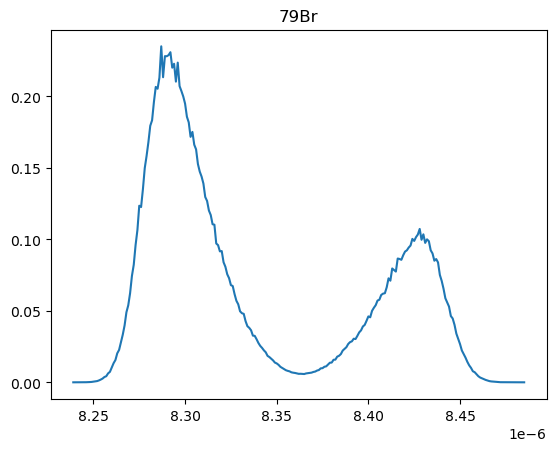

In [4]:
m = 79          # mass of fragment in a.u.
z0 = 0.011      # the center of the origin of particles
r0 = 10e-6      # the radius of the origin of particles
v_beam = 450    # beam velocity in m/s
σ_beam = 50     # half-width-half-maximum of beam velocity in m/s
v_recoil = 920  # recoil velocity in m/s
σ_recoil = 100  # half-width-half-maximum of recoil velocity in m/s
Γ = 0.0         # laser polarization tilt angle in degree
Δ = 0.0         # orienting field elevation angle in degree
Φ = 0.0         # orienting field azimuth angle in degree
α = 139.0       # angle between recoil velocity and permanent dipole
χ = 166.0       # angle between recoil velocity and transition dipole
ϕ = 0.0         # azimuthal angle betwenn permanent dipole and transition dipole around recoil velocity
c1 = -0.35      # orientation coefficient
c2 =  0.50      # alignment coefficient

results79 = simulate_tof(1_000_000, apprts, z0, r0, m, v_beam, σ_beam, v_recoil, σ_recoil, 
                         Γ, Δ, Φ, α, χ, ϕ, c1, c2)
tmin79, tmax79 = time_extrema(apprts, z0, r0, m, v_beam, σ_beam, v_recoil, σ_recoil)
tof79, spectrum79 = binning_tof(results79, tmin79, tmax79)

plot(tof79, spectrum79)
title("79Br")
;

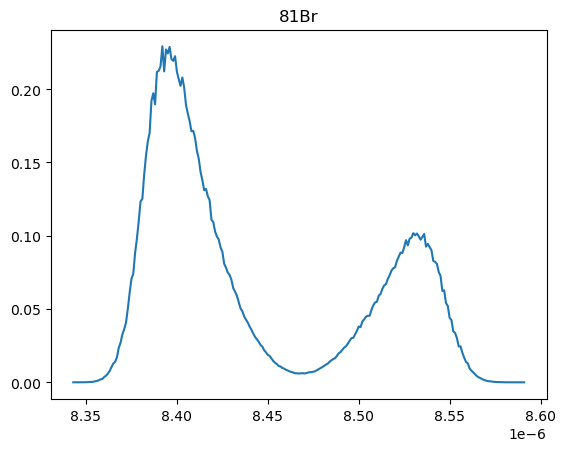

In [5]:
m = 81                  # mass of fragment in a.u.
z0 = 0.011      # the center of the origin of particles
r0 = 10e-6      # the radius of the origin of particles
v_beam = 450            # beam velocity in m/s
σ_beam = 50             # half-width-half-maximum of beam velocity in m/s
v_recoil = 920*(79/81)  # recoil velocity in m/s
σ_recoil = 100          # half-width-half-maximum of recoil velocity in m/s
Γ = 0.0                 # laser polarization tilt angle in degree
Δ = 0.0                 # orienting field elevation angle in degree
Φ = 0.0                 # orienting field azimuth angle in degree
α = 139.0               # angle between recoil velocity and permanent dipole
χ = 166.0               # angle between recoil velocity and transition dipole
ϕ = 0.0                 # azimuthal angle betwenn permanent dipole and transition dipole around recoil velocity
c1 = -0.35              # orientation coefficient
c2 =  0.50              # alignment coefficient

results81 = simulate_tof(1_000_000, apprts, z0, r0, m, v_beam, σ_beam, v_recoil, σ_recoil, 
                         Γ, Δ, Φ, α, χ, ϕ, c1, c2)
tmin81, tmax81 = time_extrema(apprts, z0, r0, m, v_beam, σ_beam, v_recoil, σ_recoil)
tof81, spectrum81 = binning_tof(results81, tmin81, tmax81)

plot(tof81, spectrum81)
title("81Br")
;

## step 3: Merge two spectra (optional)

```julia
merge_tof(tof1, spectrum1, weight1, tof2, spectrum2, weight2)
```

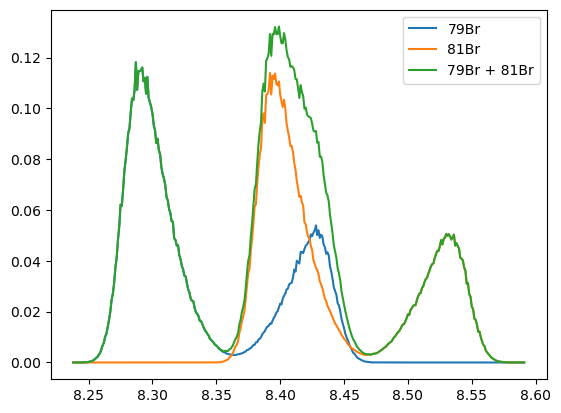

In [6]:
w79 = 0.503      # natural abundance of 79Br
w81 = 1.0 - w79  # natural abundance of 81Br

tof, spectra = merge_tof(tof79, spectrum79, w79, tof81, spectrum81, w81)

# spectra[:, 1] corresponds to 79Br+81Br
# spectra[:, 2] corresponds to 79Br
# spectra[:, 3] corresponds to 81Br
t = tof.*1e6  # adjust to micro second
spec   = spectra[:, 1]
spec79 = spectra[:, 2]
spec81 = spectra[:, 3]
plot(t, spec79, label="79Br")
plot(t, spec81, label="81Br")
plot(t, spec,   label="79Br + 81Br")
legend()
;